In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit


In [ ]:
q_5_FIRE= np.load("q_5_FIRE.npy")
rho_1kpc_dm_FIRE_avg= np.load("rho_1kpc_dm_FIRE_avg.npy")
q_5_Auriga= np.load("q_5_Auriga.npy")
rho_1kpc_dm_Auriga_avg= np.load("rho_1kpc_dm_Auriga_avg.npy")
stellar_den_1kpc_FIRE_gev_avg= np.load("stellar_den_1kpc_FIRE_gev_avg.npy")
stellar_den_1kpc_Auriga_gev_avg= np.load("stellar_den_1kpc_Auriga_gev_avg.npy")
stellar_den_1kpc_MW= np.load("MW_stellar_den.npy")

# Combine data
x_data = np.concatenate((q_5_FIRE, q_5_Auriga))
y_data = np.concatenate((rho_1kpc_dm_FIRE_avg, rho_1kpc_dm_Auriga_avg))
x_data_stellar_gev = np.concatenate((q_5_FIRE, q_5_Auriga))
y_data_stellar_gev = np.concatenate((stellar_den_1kpc_FIRE_gev_avg, stellar_den_1kpc_Auriga_gev_avg))


In [15]:
# Define a linear function
def linear_func(x, a, b):
    return a * x + b

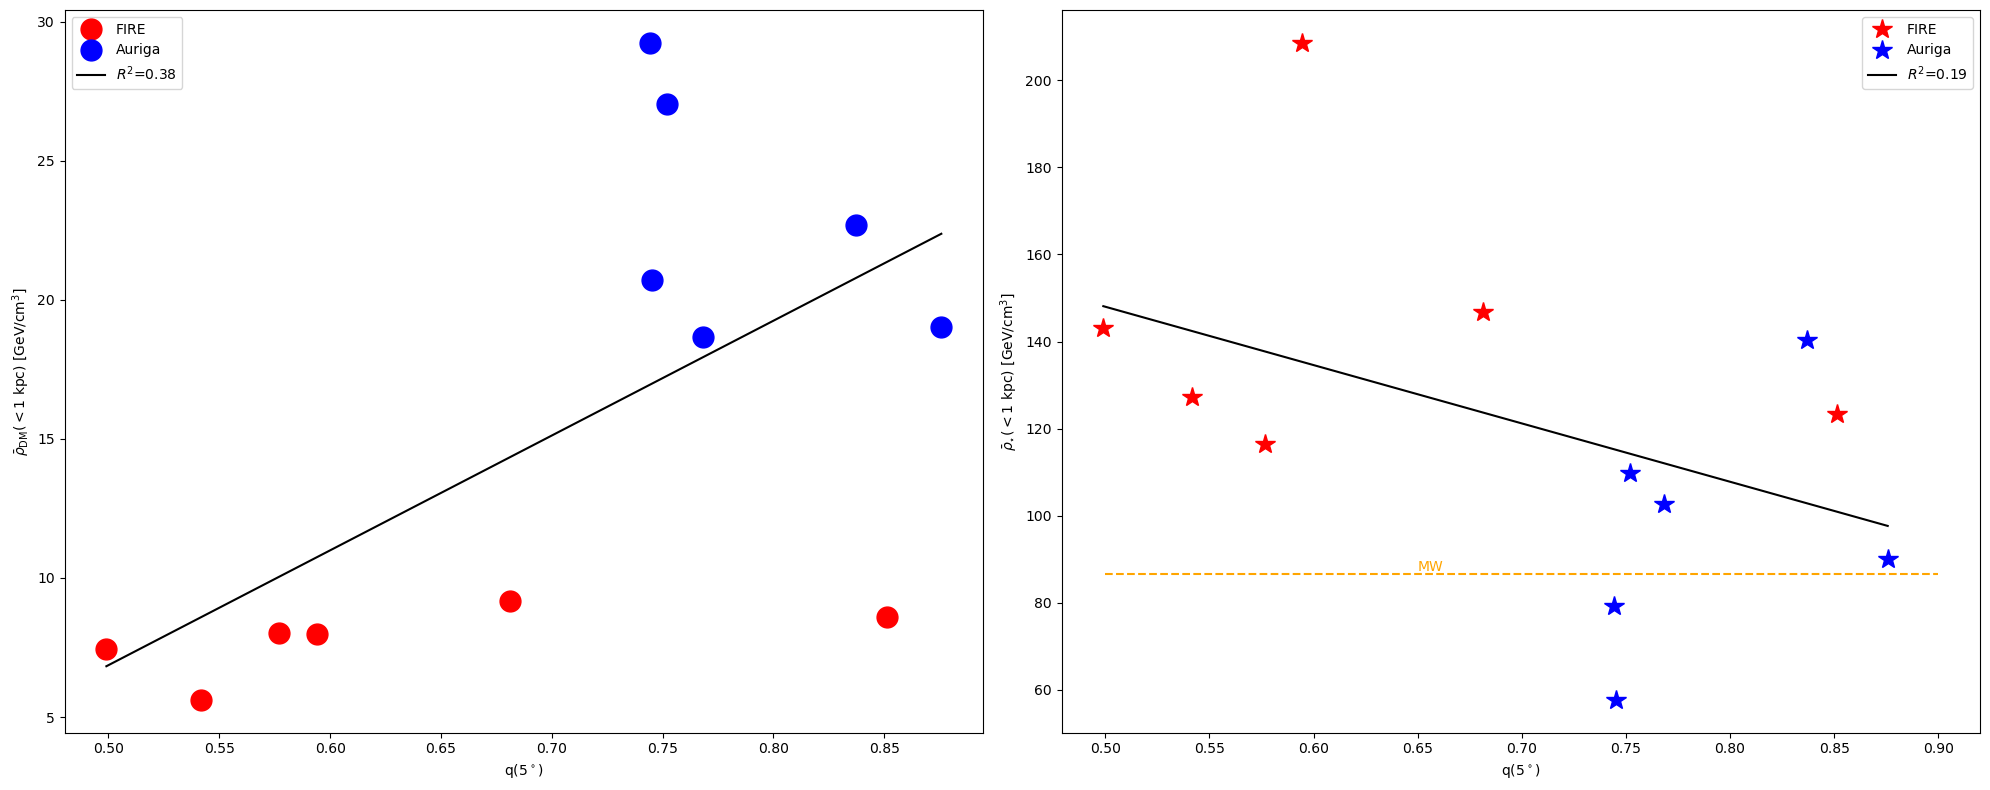

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
size = 15
# Plot for dark matter density
axs[0].plot(q_5_FIRE, rho_1kpc_dm_FIRE_avg, 'o', color='red', label='FIRE', markersize=size)
axs[0].plot(q_5_Auriga, rho_1kpc_dm_Auriga_avg, 'o', color='blue', label='Auriga', markersize=size)

# Fit the data
params_dm, _ = curve_fit(linear_func, x_data, y_data)
a_dm, b_dm = params_dm

# Calculate the fitted line
x_fit_dm = np.linspace(min(x_data), max(x_data), 100)
y_fit_dm = linear_func(x_fit_dm, a_dm, b_dm)

# Calculate residuals and R²
residuals_dm = y_data - linear_func(x_data, a_dm, b_dm)
ss_res_dm = np.sum(residuals_dm ** 2)
ss_tot_dm = np.sum((y_data - np.mean(y_data)) ** 2)
r_squared_dm = 1 - (ss_res_dm / ss_tot_dm)

# Plot the fitted line
axs[0].plot(x_fit_dm, y_fit_dm, '-', color='black', label=rf'$R^2$={r_squared_dm:.2f}')
axs[0].set_xlabel('q($5^\circ$)')
axs[0].set_ylabel(r'$\bar{\rho}_{\rm{DM}}(<1\  \rm{kpc})$ [GeV/cm$^3$]')
axs[0].legend(loc='upper left')

# Plot for stellar density in GeV/cm^3
axs[1].plot(q_5_FIRE, stellar_den_1kpc_FIRE_gev_avg, '*', color='red', label='FIRE', markersize=size)
axs[1].plot(q_5_Auriga, stellar_den_1kpc_Auriga_gev_avg, '*', color='blue', label='Auriga', markersize=size)

# Fit the data
params_stellar_gev, _ = curve_fit(linear_func, x_data_stellar_gev, y_data_stellar_gev)
a_stellar_gev, b_stellar_gev = params_stellar_gev

# # Calculate the fitted line
x_fit_stellar_gev = np.linspace(min(x_data_stellar_gev), max(x_data_stellar_gev), 100)
y_fit_stellar_gev = linear_func(x_fit_stellar_gev, a_stellar_gev, b_stellar_gev)

# # Calculate residuals and R²
residuals_stellar_gev = y_data_stellar_gev - linear_func(x_data_stellar_gev, a_stellar_gev, b_stellar_gev)
ss_res_stellar_gev = np.sum(residuals_stellar_gev ** 2)
ss_tot_stellar_gev = np.sum((y_data_stellar_gev - np.mean(y_data_stellar_gev)) ** 2)
r_squared_stellar_gev = 1 - (ss_res_stellar_gev / ss_tot_stellar_gev)


axs[1].hlines(stellar_den_1kpc_MW, 0.5, 0.9, color='orange', linestyle='--')
axs[1].text(0.65, stellar_den_1kpc_MW, 'MW', color='orange', verticalalignment='bottom')
# Plot the fitted line
axs[1].plot(x_fit_stellar_gev, y_fit_stellar_gev, '-', color='black', label=rf'$R^2$={r_squared_stellar_gev:.2f}')
axs[1].set_xlabel('q($5^\circ$)')
axs[1].set_ylabel(r'$\bar{\rho}_{\star}(<1\  \rm{kpc})$ [GeV/cm$^3$]')
axs[1].legend()

fig.tight_layout()
# fig.savefig('rho_q_correlation.pdf',dpi=500)